In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import griddata
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Create a grid for the original vector field
np.random.seed(42+7)
min_val = 1.2
x, y = np.meshgrid(np.linspace(-min_val, min_val, 20), np.linspace(-min_val, min_val, 20))
xy = np.vstack([x.ravel(), y.ravel()]).T

# Define the kernel for the Gaussian process with random parameters
length_scale = np.random.uniform(0.1, 1.0)
kernel = C(1.0, (1e-4, 1e1)) * RBF(length_scale, (1e-4, 1e1))

# Sample from the kernel to generate the vector field
K = kernel(xy)
u = np.random.multivariate_normal(np.zeros(xy.shape[0]), K).reshape(x.shape)
v = np.random.multivariate_normal(np.zeros(xy.shape[0]), K).reshape(x.shape)
u, v = scale_velocity(u, v, max_norm=.5)


# Plot the vector field
plt.figure(figsize=(10, 10))
plt.quiver(x, y, u, v)
plt.title('Random Vector Field Generated by Gaussian Process Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

NameError: name 'scale_velocity' is not defined

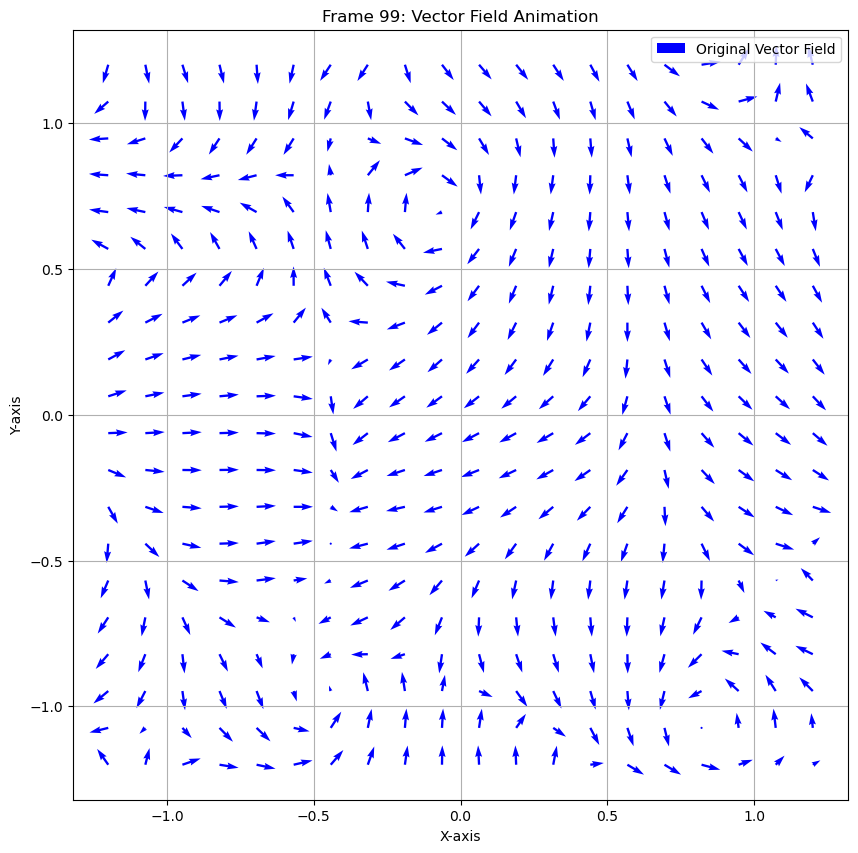

In [115]:
# Create a figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 10))

def update(frame):
    ax.clear()
    # Change the second vector field slightly for animation
    norm = 0.5 + 0.5 * frame / 100
    u2_dynamic = norm * u
    v2_dynamic = norm * v
    
    # Plot the original vector field
    ax.quiver(x, y, u, v, color='blue', scale=20, label='Original Vector Field')
    
    ax.set_title(f'Frame {frame}: Vector Field Animation')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(True)
    ax.legend(loc='upper right')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=100)

# To display the animation in a Jupyter Notebook, uncomment the line below:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# Save the animation as a video file (optional)
ani.save('vf_pertnorm.mp4', writer='ffmpeg')

plt.show()

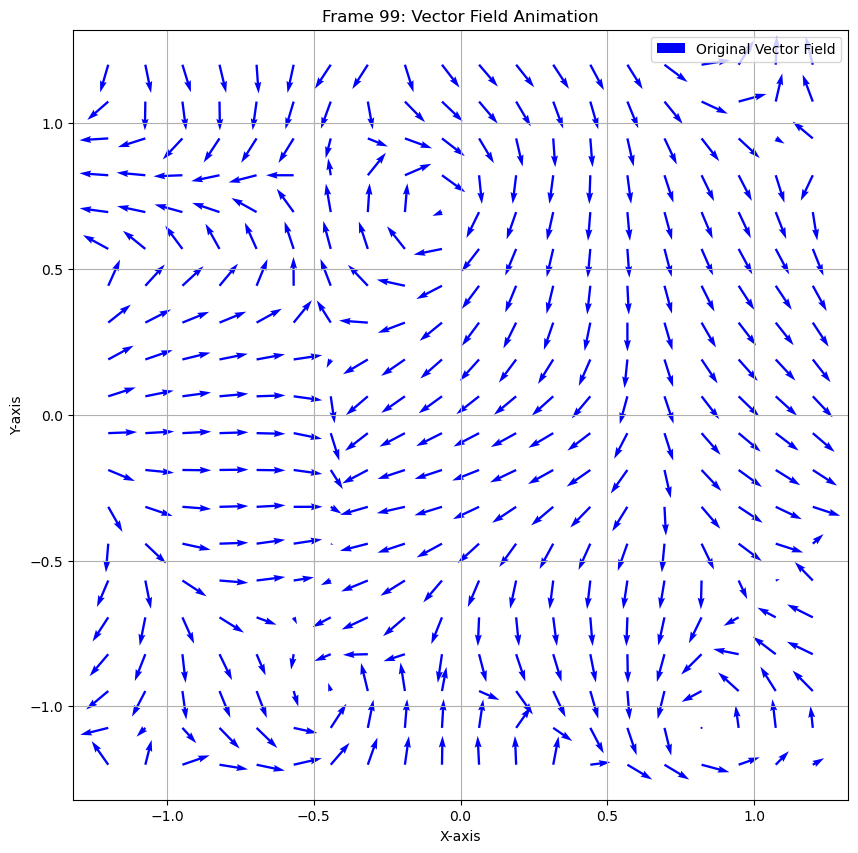

In [ ]:
# Create a figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 10))

def update(frame):
    ax.clear()
    # Change the second vector field slightly for animation
    norm = 0.5 + frame / 100
    u2_dynamic = norm * u
    v2_dynamic = norm * v
    
    # Plot the original vector field
    ax.quiver(x, y, u2_dynamic, v2_dynamic, color='blue', scale=20, label='Original Vector Field')
    
    ax.set_title(f'Frame {frame}: Vector Field Animation')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(True)
    ax.legend(loc='upper right')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=60, interval=50)

# To display the animation in a Jupyter Notebook, uncomment the line below:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# Save the animation as a video file (optional)
ani.save('vf_pertnorm.mp4', writer='ffmpeg')

plt.show()

In [13]:
def scale_velocity(U, V, max_norm):
    # Compute the magnitude of the velocity vectors
    magnitude = np.sqrt(U**2 + V**2)
    
    # Determine the scaling factor
    scale = np.minimum(1, max_norm / magnitude)
    
    # Scale the velocity components
    U_scaled = U * scale
    V_scaled = V * scale
    
    return U_scaled, V_scaled

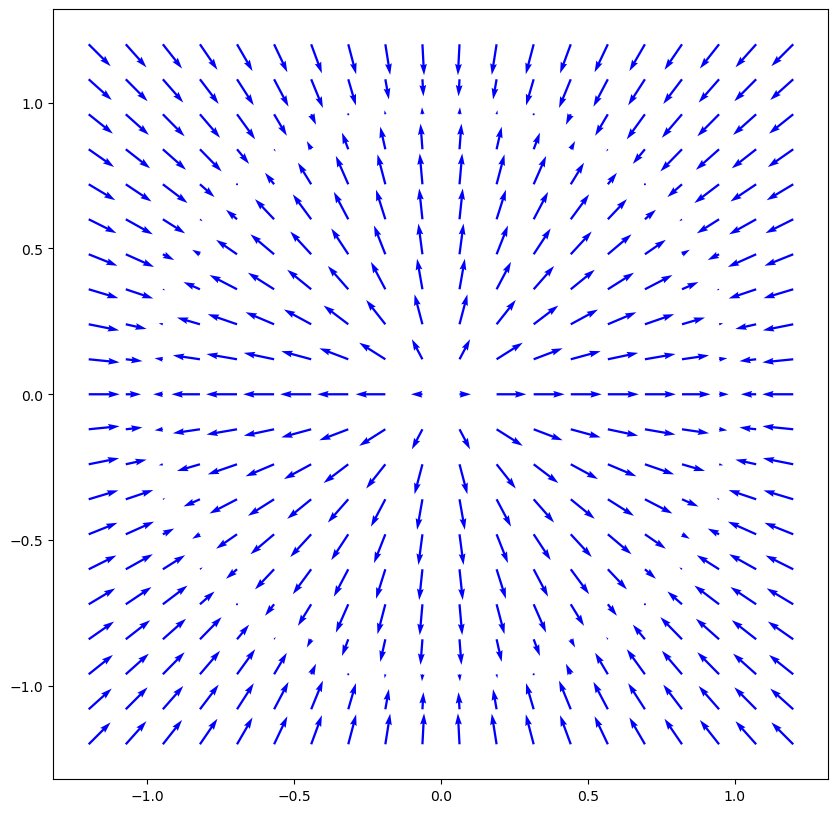

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import griddata

# Create a grid for the original vector field
min_val = 1.2
x, y = np.meshgrid(np.linspace(-min_val, min_val, 20), np.linspace(-min_val, min_val, 21))

alpha = 5
# Define the original vector field
sqrtxy = np.sqrt(x**2 + y**2)
u = alpha * x * (1- sqrtxy)
v = alpha * y * (1- sqrtxy)
u, v = scale_velocity(u, v, max_norm=.8)

# Create a scatter grid for another vector field with dynamic properties
x2 = np.random.uniform(-min_val, min_val, 100)
y2 = np.random.uniform(-min_val, min_val, 100)
u2 = np.sin(x2) * np.cos(y2)
v2 = np.cos(x2) * np.sin(y2)

# Interpolation setup
points = np.array([x2, y2]).T

# Create a figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 10))
ax.quiver(x, y, u, v, color='blue', scale=20, label='Original Vector Field')

plt.show()


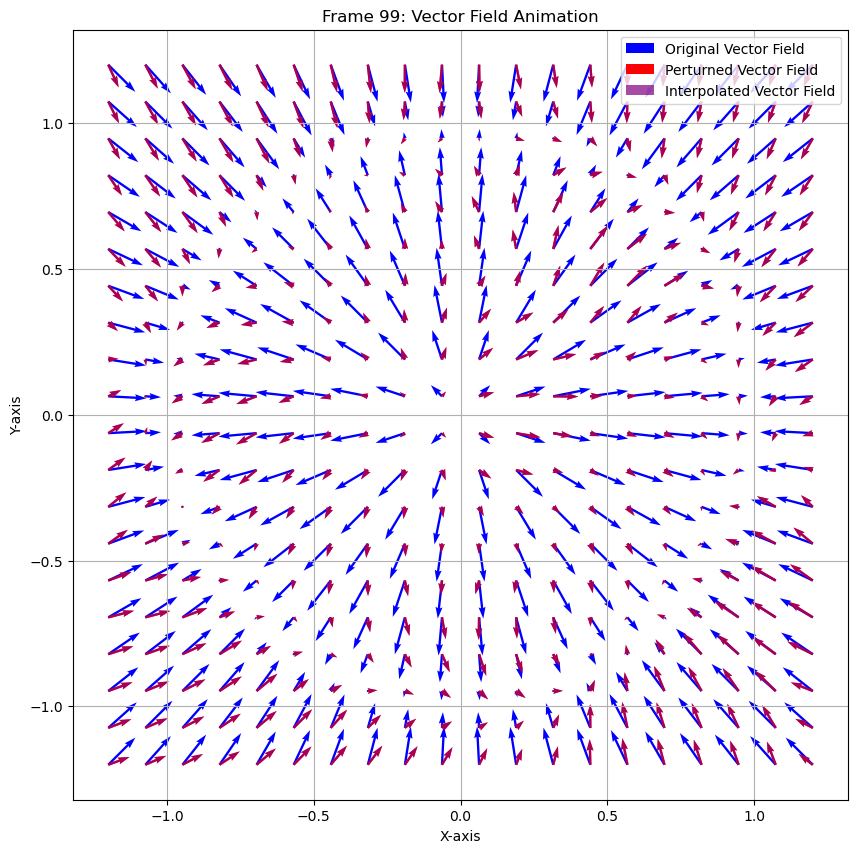

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import griddata

# Create a grid for the original vector field
min_val = 1.2
x, y = np.meshgrid(np.linspace(-min_val, min_val, 20), np.linspace(-min_val, min_val, 20))

# Define the original vector field
alpha = 5
sqrtxy = np.sqrt(x**2 + y**2)
u = alpha * x * (1- sqrtxy)
v = alpha * y * (1- sqrtxy)
u, v = scale_velocity(u, v, max_norm=.99)

# Create a figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 10))

phase = 120
final_u = np.sin(x + phase) * np.cos(y + phase) 
final_v = np.cos(x + phase) * np.sin(y + phase) 
#final_u, final_v = scale_velocity(final_u, final_v, max_norm=.8)
final_u = (final_u + u)/2
final_v = (final_v + v)/2

np.random.seed(42+7)
final_u = np.random.multivariate_normal(np.zeros(xy.shape[0]), K).reshape(x.shape)
final_v = np.random.multivariate_normal(np.zeros(xy.shape[0]), K).reshape(x.shape)
final_u, final_v = scale_velocity(final_u, final_v, max_norm=.5)
final_u = (final_u + u)/2
final_v = (final_v + v)/2

n_frames = 100
def update(frame):
    ax.clear()
    # Change the second vector field slightly for animation
    # phase = frame / 10.0
    norm = frame / n_frames

    # Interpolate the dynamic vector field
    interpol_u = norm * final_u + (1 - norm) * u
    interpol_v = norm * final_v + (1 - norm) * v

    # Plot the original vector field
    ax.quiver(x, y, u, v, color='blue', scale=20, label='Original Vector Field')

    # Plot the final perturbed vector field
    ax.quiver(x, y, final_u, final_v, color='red', scale=20, label='Perturned Vector Field')

    # Plot the interpolated vector field
    ax.quiver(x, y, interpol_u, interpol_v, color='purple', scale=20, alpha=0.7, label='Interpolated Vector Field')
    
    ax.set_title(f'Frame {frame}: Vector Field Animation')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(True)
    ax.legend(loc='upper right')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=n_frames, interval=100)

# To display the animation in a Jupyter Notebook, uncomment the line below:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# Save the animation as a video file (optional)
ani.save('vf_pertinterpol.mp4', writer='ffmpeg')

plt.show()


In [355]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
from matplotlib.collections import LineCollection
import matplotlib.patches as patches
from matplotlib.lines import Line2D

class Streamlines(object):
    """
    Copyright (c) 2011 Raymond Speth.

    Permission is hereby granted, free of charge, to any person obtaining a
    copy of this software and associated documentation files (the "Software"),
    to deal in the Software without restriction, including without limitation
    the rights to use, copy, modify, merge, publish, distribute, sublicense,
    and/or sell copies of the Software, and to permit persons to whom the
    Software is furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in
    all copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
    FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
    DEALINGS IN THE SOFTWARE.

    See: http://web.mit.edu/speth/Public/streamlines.py
    """

    def __init__(self, X, Y, U, V, res=0.125,
                 spacing=2, maxLen=2500, detectLoops=False):
        """
        Compute a set of streamlines covering the given velocity field.

        X and Y - 1D or 2D (e.g. generated by np.meshgrid) arrays of the
                  grid points. The mesh spacing is assumed to be uniform
                  in each dimension.
        U and V - 2D arrays of the velocity field.
        res - Sets the distance between successive points in each
              streamline (same units as X and Y)
        spacing - Sets the minimum density of streamlines, in grid points.
        maxLen - The maximum length of an individual streamline segment.
        detectLoops - Determines whether an attempt is made to stop extending
                      a given streamline before reaching maxLen points if
                      it forms a closed loop or reaches a velocity node.

        Plots are generated with the 'plot' or 'plotArrows' methods.
        """

        self.spacing = spacing
        self.detectLoops = detectLoops
        self.maxLen = maxLen
        self.res = res

        xa = np.asanyarray(X)
        ya = np.asanyarray(Y)
        self.x = xa if xa.ndim == 1 else xa[0]
        self.y = ya if ya.ndim == 1 else ya[:,0]
        self.u = U
        self.v = V
        self.dx = (self.x[-1]-self.x[0])/(self.x.size-1) # assume a regular grid
        self.dy = (self.y[-1]-self.y[0])/(self.y.size-1) # assume a regular grid
        self.dr = self.res * np.sqrt(self.dx * self.dy)

        # marker for which regions have contours
        self.used = np.zeros(self.u.shape, dtype=bool)
        self.used[0] = True
        self.used[-1] = True
        self.used[:,0] = True
        self.used[:,-1] = True

        # Don't try to compute streamlines in regions where there is no velocity data
        for i in range(self.x.size):
            for j in range(self.y.size):
                if self.u[j,i] == 0.0 and self.v[j,i] == 0.0:
                    self.used[j,i] = True

        # Make the streamlines
        self.streamlines = []
        while not self.used.all():
            nz = np.transpose(np.logical_not(self.used).nonzero())
            # Make a streamline starting at the first unrepresented grid point
            self.streamlines.append(self._makeStreamline(self.x[nz[0][1]],
                                                         self.y[nz[0][0]]))


    def _interp(self, x, y):
        """ Compute the velocity at point (x,y) """
        i = (x-self.x[0])/self.dx
        ai = i % 1

        j = (y-self.y[0])/self.dy
        aj = j % 1

        i, j = int(i), int(j)
        
        # Bilinear interpolation
        u = (self.u[j,i]*(1-ai)*(1-aj) +
             self.u[j,i+1]*ai*(1-aj) +
             self.u[j+1,i]*(1-ai)*aj +
             self.u[j+1,i+1]*ai*aj)

        v = (self.v[j,i]*(1-ai)*(1-aj) +
             self.v[j,i+1]*ai*(1-aj) +
             self.v[j+1,i]*(1-ai)*aj +
             self.v[j+1,i+1]*ai*aj)

        self.used[j:j+self.spacing,i:i+self.spacing] = True

        return u,v

    def _makeStreamline(self, x0, y0):
        """
        Compute a streamline extending in both directions from the given point.
        """

        sx, sy = self._makeHalfStreamline(x0, y0, 1) # forwards
        rx, ry = self._makeHalfStreamline(x0, y0, -1) # backwards

        rx.reverse()
        ry.reverse()

        return rx+[x0]+sx, ry+[y0]+sy

    def _makeHalfStreamline(self, x0, y0, sign):
        """
        Compute a streamline extending in one direction from the given point.
        """

        xmin = self.x[0]
        xmax = self.x[-1]
        ymin = self.y[0]
        ymax = self.y[-1]

        sx = []
        sy = []

        x = x0
        y = y0
        i = 0
        while xmin < x < xmax and ymin < y < ymax:
            u, v = self._interp(x, y)
            theta = np.arctan2(v,u)

            x += sign * self.dr * np.cos(theta)
            y += sign * self.dr * np.sin(theta)
            sx.append(x)
            sy.append(y)

            i += 1

            if self.detectLoops and i % 10 == 0 and self._detectLoop(sx, sy):
                break

            if i > self.maxLen / 2:
                break

        return sx, sy

    def _detectLoop(self, xVals, yVals):
        """ Detect closed loops and nodes in a streamline. """
        x = xVals[-1]
        y = yVals[-1]
        D = np.array([np.hypot(x-xj, y-yj)
                      for xj,yj in zip(xVals[:-1],yVals[:-1])])
        return (D < 0.9 * self.dr).any()

In [356]:
def get_random_vector_field_from_ringattractor(min_val_sim = 2, min_val_plot = 1.3, n_grid = 40, norm = 0.05, random_seed = 49):
    # Define the grid points
    Y, X = np.mgrid[-min_val_sim:min_val_sim:complex(0, n_grid), -min_val_sim:min_val_sim:complex(0, n_grid)]

    #Ring attractor vector field
    U = X * (1- np.sqrt(X**2 + Y**2))
    V = Y * (1- np.sqrt(X**2 + Y**2))
    speed = np.sqrt(U*U + V*V)

    #set seed
    np.random.seed(random_seed)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    #generate random length scale
    length_scale = np.random.uniform(0.1, 1.0)
    #set kernel
    kernel = C(1.0, (1e-4, 1e1)) * RBF(length_scale, (1e-4, 1e1))
    K = kernel(xy)
    #generate random vector field
    perturb_u = np.random.multivariate_normal(np.zeros(xy.shape[0]), K).reshape(X.shape)
    perturb_v = np.random.multivariate_normal(np.zeros(xy.shape[0]), K).reshape(X.shape)
    #scale
    magnitude =  np.sqrt(perturb_u**2 + perturb_v**2)
    perturb_u, perturb_v = perturb_u/magnitude, perturb_v/magnitude
    #set norm
    U_pert = U + norm * perturb_u
    V_pert = V + norm * perturb_v
    return U_pert, V_pert

In [376]:
def initialize_streamlines(ax, S, cmap):
    lengths, colors, lines = [],[],[]

    for streamline in S.streamlines:
        x, y = streamline
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        n = len(segments)
        
        D = np.sqrt(((points[1:] - points[:-1])**2).sum(axis=-1))
        L = D.cumsum().reshape(n,1) + np.random.uniform(0,1)
        L = L.ravel()
        C = np.zeros((n,3))
        #C[:] = (L*1.5) % 1
        C[:] = cmap((L*1.5) % 1)[:, :3] 

        line = LineCollection(segments, color=C, linewidth=0.5)
        lengths.append(L)
        colors.append(C)
        lines.append(line)
        
        ax.add_collection(line)
    return lengths, colors, lines


def make_streamline_animation_from_fixed_vf(vid_name,X,Y,U_pert,V_pert,cmap,n_steps=27,inv_man=None,
                                            min_val_plot=1.3,    interpol_param=0.,
                                            fps=30,writer='imagemagick',save_as='gif'):
    fig = plt.figure(figsize=(4,4), facecolor='black')
    ax = plt.subplot(1, 1, 1, aspect=1, facecolor='black')
    ax.margins(0)  # No margin around the data

    lengths, colors, lines = [],[],[]

    s = Streamlines(X, Y, U_pert, V_pert)
    lengths, colors, lines = initialize_streamlines(ax, s, cmap)

    #progrss ball
    progress_scaling = .5
    circle_init_pos = np.array([min_val_plot-0.7, -min_val_plot+.2])
    circle = patches.Circle(circle_init_pos, 0.025, color='cyan', zorder=10)
    ax.add_patch(circle)

    # Add time axis
    line = Line2D([circle_init_pos[0], circle_init_pos[0]+progress_scaling], [circle_init_pos[1]-.08, circle_init_pos[1]-.08], color='cyan', lw=2, zorder=5)  # Static line
    ax.add_line(line)

    # Add norm axis
    line2 = Line2D([circle_init_pos[0]+progress_scaling, circle_init_pos[0]+progress_scaling], [circle_init_pos[1]-.08, circle_init_pos[1]-.08+progress_scaling], color='cyan', lw=2, zorder=5)  # Static line
    ax.add_line(line2)

    # Add time text 
    text = ax.text(circle_init_pos[0], circle_init_pos[1]-.1, 'time', color='cyan', fontsize=12, ha='left', va='top', zorder=5)

    # Add norm text 
    text = ax.text(circle_init_pos[0]+progress_scaling+.02, circle_init_pos[1]-.1+0.01, 'norm', color='cyan', fontsize=12, ha='left', va='bottom', zorder=5, rotation=90)

    def update(frame_no):
        for i in range(len(lines)):
            lengths[i] -= 0.05
            #colors[i][:] = (lengths[i]*1.5) % 1
            colors[i][:] = cmap((lengths[i]*1.5) % 1)[:, :3]
            lines[i].set_color(colors[i])

            circle.set_center(circle_init_pos+np.array([progress_scaling*frame_no/n_steps, interpol_param/2.]))

        pbar.update()

    ax.set_xlim(-min_val_plot,+min_val_plot), ax.set_xticks([])
    ax.set_ylim(-min_val_plot,+min_val_plot), ax.set_yticks([])
    if np.any(inv_man):
        ax.plot(inv_man[:,0], inv_man[:,1], 'r', zorder=1000, linewidth=3)

    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    ax.set_frame_on(False)

    #progress bar
    # bar_frame = plt.Rectangle([min_val_plot-0.15, -min_val_plot+0.02], 0.05, 1, edgecolor='cyan', facecolor="none", zorder=100)
    # ax.add_patch(bar_frame)
    # bar = plt.Rectangle([min_val_plot-0.15, -min_val_plot+0.02], 0.05, interpol_param, edgecolor='cyan', alpha=1, zorder=100)
    # ax.add_patch(bar)

    animation = FuncAnimation(fig, update, frames=n_steps, interval=20)
    pbar = tqdm.tqdm(total=n_steps)
    plt.margins(0,0)
    ax.margins(0,0)
    if save_as=='mp4':
        animation.save(vid_name+'.mp4', writer=writer, fps=fps)
    if save_as=='gif':
        animation.save(vid_name+'.gif', writer=writer, fps=fps)
    pbar.close()

    return animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap, Normalize
import tqdm
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
min_val_sim = 3
min_val_plot = 1.6
n_grid = 40
random_seed = 313
norm=0.2
n_steps=27
Y, X = np.mgrid[-min_val_sim:min_val_sim:complex(0, n_grid), -min_val_sim:min_val_sim:complex(0, n_grid)]

colors = ["green", "yellow"]  # Start color, end color
cmap = LinearSegmentedColormap.from_list("two_color_gradient", colors)

#print("Creating grid and vector field...")
#U_pert, V_pert = get_random_vector_field_from_ringattractor(min_val_sim=min_val_sim, min_val_plot=min_val_plot, n_grid=n_grid, norm=norm, random_seed=random_seed)
print("Animating streamlines...")
animation = make_streamline_animation_from_fixed_vf(f'pring_{colors[0]}{colors[1]}_ngrid{n_grid}_rs{random_seed}',
                                                    X,Y,U_pert,V_pert,cmap,n_steps=n_steps,
                                                    inv_man=None,save_as='gif')

Animating streamlines...


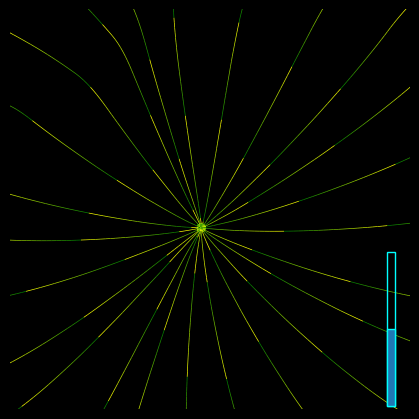

In [303]:
fig = plt.figure(figsize=(4,4), facecolor='black')
ax = plt.subplot(1, 1, 1, aspect=1, facecolor='black')
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=None, hspace=None)
ax.margins(0)  # No margin around the data

lengths, colors, lines = [],[],[]

s = Streamlines(X, Y, U_pert, V_pert)
for streamline in s.streamlines:
    x, y = streamline
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    n = len(segments)
    
    D = np.sqrt(((points[1:] - points[:-1])**2).sum(axis=-1))
    L = D.cumsum().reshape(n,1) + np.random.uniform(0,1)
    L = L.ravel()

    C = np.zeros((n,3))
    #C[:] = (L*1.5) % 1
    C[:] = cmap((L*1.5) % 1)[:, :3] 

    line = LineCollection(segments, color=C, linewidth=0.5)
    lengths.append(L)
    colors.append(C)
    lines.append(line)
    
    ax.add_collection(line)

ax.set_xlim(-min_val_plot,+min_val_plot), ax.set_xticks([])
ax.set_ylim(-min_val_plot,+min_val_plot), ax.set_yticks([])

ax.set_axis_off()
#plt.margins(0,0)
#ax. margins(0,0)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
fig.add_axes(ax)

bar_frame = plt.Rectangle([min_val_plot-0.15, -min_val_plot+0.02], 0.05, 1, edgecolor='cyan', facecolor="none", zorder=100)
ax.add_patch(bar_frame)
bar = plt.Rectangle([min_val_plot-0.15, -min_val_plot+0.02], 0.05, interpol_param, edgecolor='cyan', alpha=1, zorder=100)
ax.add_patch(bar)

#plt.plot([min_val_plot-0.1, min_val_plot-0.1], [-min_val_plot+1, -min_val_plot+interpol_param], 'cyan', linewidth=4)

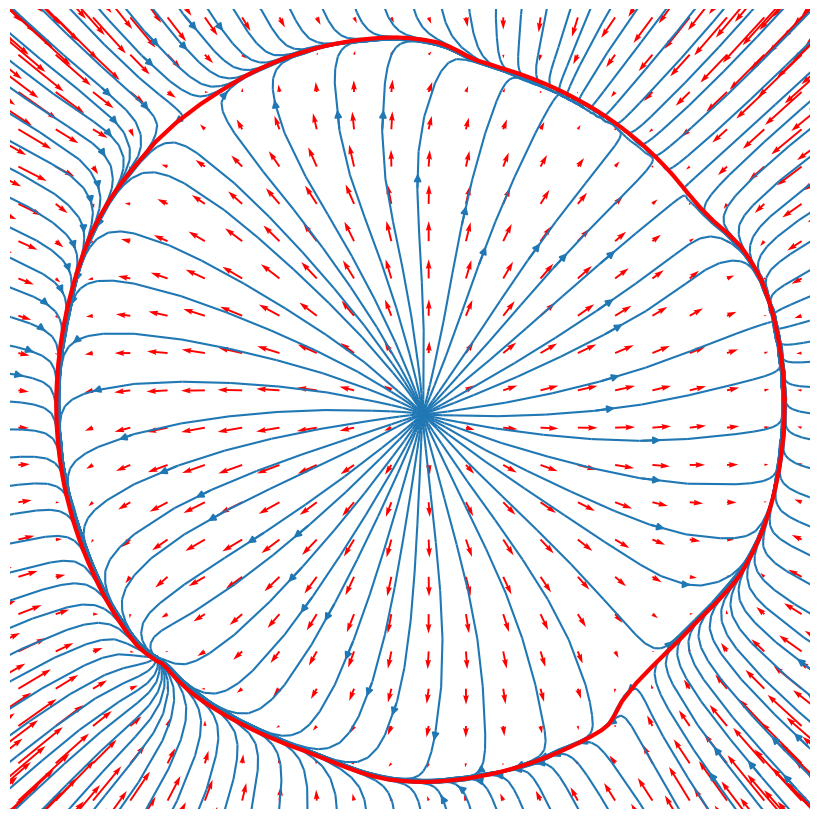

In [127]:
fig, ax = plt.subplots(figsize=(8, 8))

i = 7
interpol_param = 0.1*i
interpol_u = (1 - interpol_param) * U + interpol_param * U_pert
interpol_v = (1 - interpol_param) * V + interpol_param * V_pert

ax.streamplot(X, Y, interpol_u, interpol_v, broken_streamlines=False)
ax.quiver(X, Y, interpol_u, interpol_v, color='red', scale=9)
ax.plot(inv_mans[i,:,0], inv_mans[i,:,1], 'r', linewidth=3)
#ax.plot(inv_man[:,1], inv_man[:,0], 'r')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)


  0%|          | 0/798 [00:00<?, ?it/s]

interpol_param 0.0


  0%|          | 1/798 [00:04<57:35,  4.34s/it]

interpol_param 0.0


  5%|▍         | 39/798 [00:50<12:30,  1.01it/s]

interpol_param 0.05


 10%|▉         | 77/798 [01:39<13:04,  1.09s/it]

interpol_param 0.1


 14%|█▍        | 115/798 [02:25<12:37,  1.11s/it]

interpol_param 0.15


 19%|█▉        | 153/798 [03:09<10:54,  1.02s/it]

interpol_param 0.2


 24%|██▍       | 191/798 [03:54<10:36,  1.05s/it]

interpol_param 0.25


 29%|██▊       | 229/798 [04:43<11:12,  1.18s/it]

interpol_param 0.3


 33%|███▎      | 267/798 [36:35<47:20,  5.35s/it]    

interpol_param 0.35


 38%|███▊      | 305/798 [37:26<09:46,  1.19s/it]

interpol_param 0.4


 43%|████▎     | 343/798 [40:26<13:02,  1.72s/it]  

interpol_param 0.45


 48%|████▊     | 381/798 [41:21<11:15,  1.62s/it]

interpol_param 0.5


 53%|█████▎    | 419/798 [42:19<08:50,  1.40s/it]

interpol_param 0.55


 57%|█████▋    | 457/798 [43:17<07:52,  1.38s/it]

interpol_param 0.6


 62%|██████▏   | 495/798 [44:17<06:56,  1.38s/it]

interpol_param 0.65


 67%|██████▋   | 533/798 [45:15<05:54,  1.34s/it]

interpol_param 0.7


 72%|███████▏  | 571/798 [46:11<05:53,  1.56s/it]

interpol_param 0.75


 76%|███████▋  | 609/798 [47:10<03:53,  1.24s/it]

interpol_param 0.8


 81%|████████  | 647/798 [48:01<03:01,  1.20s/it]

interpol_param 0.85


 86%|████████▌ | 685/798 [48:50<02:23,  1.27s/it]

interpol_param 0.9


 91%|█████████ | 723/798 [49:36<01:19,  1.06s/it]

interpol_param 0.95


 95%|█████████▌| 761/798 [50:22<00:43,  1.18s/it]

interpol_param 1.0


799it [51:12,  1.17s/it]                         

interpol_param 0.0


800it [57:41, 117.65s/it]

interpol_param 0.0


838it [58:33,  1.27s/it] 

interpol_param 0.05


876it [59:26,  1.32s/it]

interpol_param 0.1


914it [1:00:17,  1.27s/it]

interpol_param 0.15


952it [1:01:09,  1.30s/it]

interpol_param 0.2


990it [1:02:02,  1.30s/it]

interpol_param 0.25


1028it [1:03:00,  1.36s/it]

interpol_param 0.3


1066it [1:03:54,  1.33s/it]

interpol_param 0.35


1104it [1:04:51,  1.42s/it]

interpol_param 0.4


1142it [1:05:45,  1.35s/it]

interpol_param 0.45


1180it [1:06:42,  1.37s/it]

interpol_param 0.5


1218it [1:07:39,  1.42s/it]

interpol_param 0.55


1256it [1:08:36,  1.38s/it]

interpol_param 0.6


1294it [1:09:45,  1.94s/it]

interpol_param 0.65


1332it [1:11:07,  2.02s/it]

interpol_param 0.7


1370it [1:12:38,  2.12s/it]

interpol_param 0.75


1408it [1:14:05,  2.10s/it]

interpol_param 0.8


1446it [1:15:28,  2.07s/it]

interpol_param 0.85


1484it [1:16:52,  2.05s/it]

interpol_param 0.9


1522it [1:18:19,  2.20s/it]

interpol_param 0.95


1560it [1:19:47,  2.11s/it]

interpol_param 1.0


1598it [1:21:13,  2.12s/it]MovieWriter stderr:
magick.exe: unable to extend cache 'ring_interpol_framesperstep38_steps20.gif': No space left on device @ error/cache.c/OpenPixelCache/3925.



CalledProcessError: Command '['C:\\Program Files\\ImageMagick-7.1.1-Q16-HDRI\\magick.exe', '-size', '1000x1000', '-depth', '8', '-delay', '3.3333333333333335', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', 'ring_interpol_framesperstep38_steps20.gif']' returned non-zero exit status 1.

interpol_param 0.0


1599it [1:48:05, 485.07s/it]

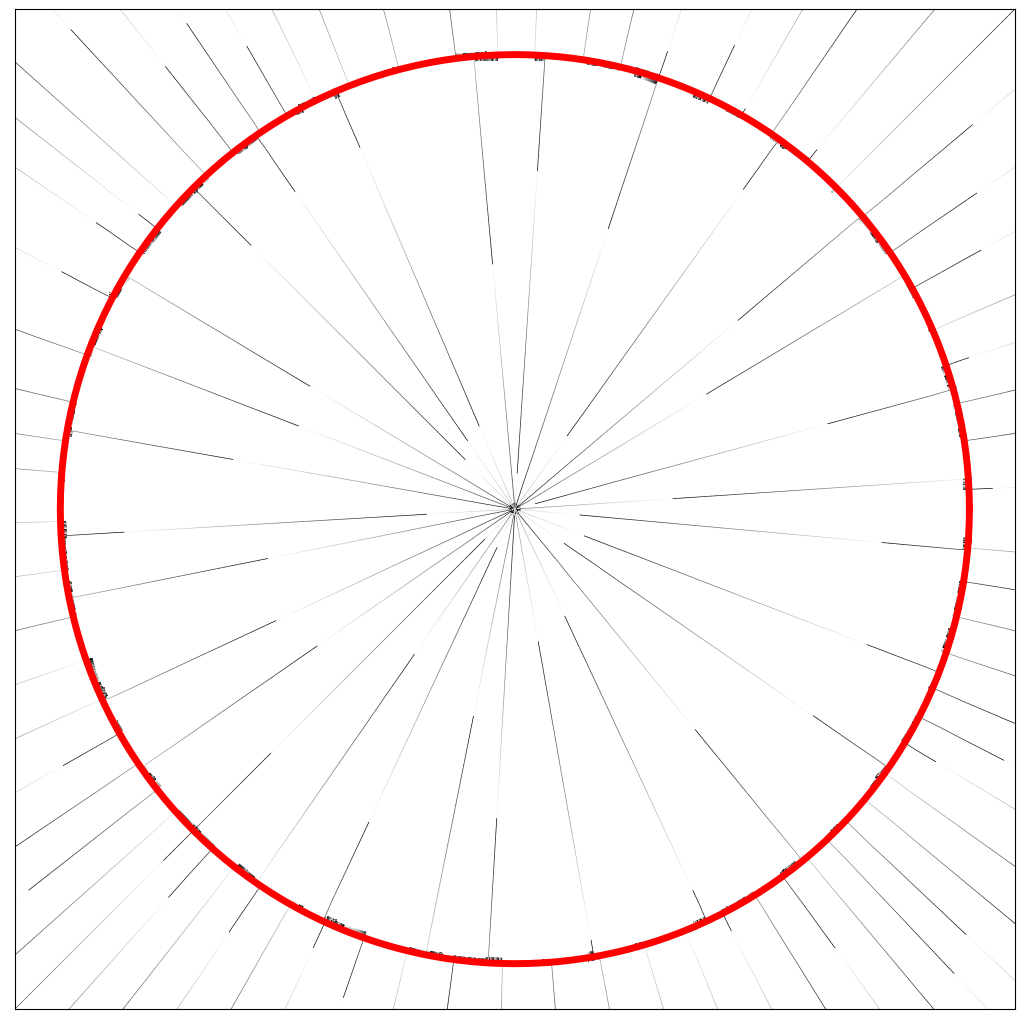

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import tqdm

colors = ["green", "yellow"]  # Start color, end color
cmap = LinearSegmentedColormap.from_list("two_color_gradient", colors)

# Create a figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-min_val_plot, min_val_plot)
ax.set_ylim(-min_val_plot, min_val_plot)
ax.plot(inv_mans[0,:,0], inv_mans[0,:,1], 'r')

# Generate streamlines
lengths, colors, lines = [], [], []
s = Streamlines(X, Y, U, V)
for streamline in s.streamlines:
    x, y = streamline
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    n = len(segments)
    
    D = np.sqrt(((points[1:] - points[:-1])**2).sum(axis=-1))
    L = D.cumsum().reshape(n,1) + np.random.uniform(0,1)
    L = L.ravel()
    C = np.zeros((n,3))
    C[:] = cmap((L*1.5) % 1)[:, :3] 
    #C[:] = (L*1.5) % 1

    line = LineCollection(segments, color=C, linewidth=0.5)
    lengths.append(L)
    colors.append(C)
    lines.append(line)
    
    ax.add_collection(line)

# Animation update function
framesperstep = 38
steps = 20
n = framesperstep*(steps+1)
def update(frame_no):
    global n, framesperstep, steps

    if frame_no % framesperstep == 0:
        interpol_param =  frame_no / (framesperstep*steps)  
        print("interpol_param", interpol_param)
        interpol_u = (1 - interpol_param) * U + interpol_param * U_pert
        interpol_v = (1 - interpol_param) * V + interpol_param * V_pert

        ax.clear()

        im_i = int(frame_no // framesperstep)
        ax.plot(inv_mans[im_i,:,0], inv_mans[im_i,:,1], 'r', zorder=1000, linewidth=5)
        ax.set_xlim(-min_val_plot, min_val_plot)
        ax.set_ylim(-min_val_plot, min_val_plot)
        ax.set_xticks([])
        ax.set_yticks([])
        s = Streamlines(X, Y, interpol_u, interpol_v)

        for streamline in s.streamlines:

            x, y = streamline
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            n = len(segments)

            D = np.sqrt(((points[1:] - points[:-1])**2).sum(axis=-1))
            L = D.cumsum().reshape(n,1) + np.random.uniform(0,1)        #make this deterministic?
            C = np.zeros((n,3))
            C[:] = cmap((L*1.5) % 1)[:, :3] 
            #C[:] = (L*1.5) % 1

            line = LineCollection(segments, color=C, linewidth=0.5)
            lengths.append(L)
            colors.append(C)
            lines.append(line)
        
            ax.add_collection(line)

        bar_frame = plt.Rectangle([min_val_plot-0.15, -min_val_plot+0.02], 0.05, 1, edgecolor='cyan', facecolor="none", zorder=100)
        ax.add_patch(bar_frame)
        bar = plt.Rectangle([min_val_plot-0.15, -min_val_plot+0.02], 0.05, interpol_param, edgecolor='cyan', alpha=1, zorder=100)
        ax.add_patch(bar)
    
    for i in range(len(lines)):
        lengths[i] -= 0.05
        colors[i][:] = cmap((lengths[i]*1.5) % 1)[:, :3]
        #colors[i][:] = (lengths[i]*1.5) % 1
        lines[i].set_color(colors[i])
    pbar.update()

ax.set_xlim(-min_val, +min_val), ax.set_xticks([])
ax.set_ylim(-min_val, +min_val), ax.set_yticks([])
plt.tight_layout()
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
animation = FuncAnimation(fig, update, frames=n, interval=20)
pbar = tqdm.tqdm(total=n)
animation.save(f'ring_interpol_framesperstep{framesperstep}_steps{steps}.mp4', writer='imagemagick', fps=30)
animation.save(f'ring_interpol_framesperstep{framesperstep}_steps{steps}.gif', writer='imagemagick', fps=30)
pbar.close()
plt.show()

In [293]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


# Define the kernel for the Gaussian process with random parameters
min_val_sim = 5
min_val_plot = 1.3
n_grid = 40
Y, X = np.mgrid[-min_val_sim:min_val_sim:complex(0, n_grid), -min_val_sim:min_val_sim:complex(0, n_grid)]

np.random.seed(random_seed)
xy = np.vstack([X.ravel(), Y.ravel()]).T
length_scale = np.random.uniform(0.1, 1.0)
kernel = C(1.0, (1e-4, 1e1)) * RBF(length_scale, (1e-4, 1e1))
K = kernel(xy)
perturb_u = np.random.multivariate_normal(np.zeros(xy.shape[0]), K).reshape(X.shape)
perturb_v = np.random.multivariate_normal(np.zeros(xy.shape[0]), K).reshape(X.shape)
#perturb_u, perturb_v = scale_velocity(perturb_u, perturb_v, max_norm=1)
magnitude =  np.sqrt(perturb_u**2 + perturb_v**2)
perturb_u, perturb_v = perturb_u/magnitude, perturb_v/magnitude
norm = 0.2
U_pert = U + norm * perturb_u
V_pert = V + norm * perturb_v

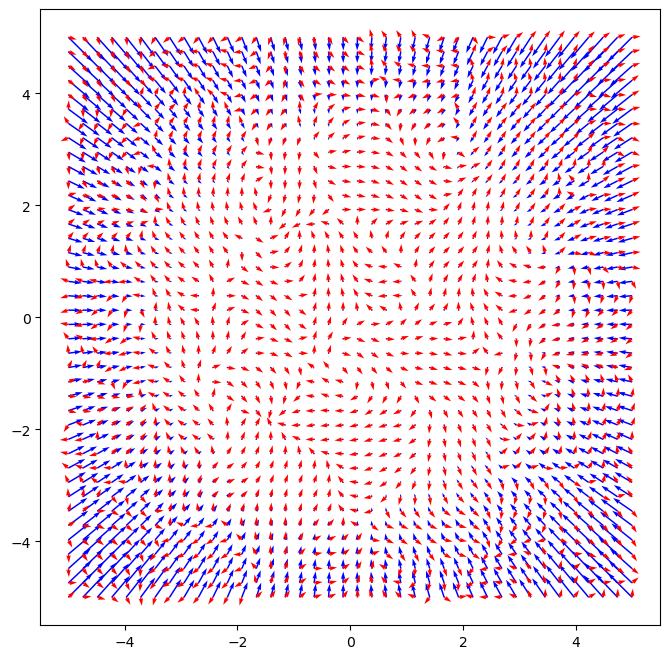

In [294]:
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color='blue')
plt.quiver(X, Y, perturb_u, perturb_v, color='red')

In [295]:
from scipy.integrate import solve_ivp

def vector_field_ode(t, x, perturb_grid_u, perturb_grid_v, interpol_param):
    x1, x2 = x

    u = x1 * (1 - np.sqrt(x1**2 + x2**2))
    v = x2 * (1 - np.sqrt(x1**2 + x2**2))
    
    u = u + interpol_param*perturb_grid_u([x2,x1]).item()
    v = v + interpol_param*perturb_grid_v([x2,x1]).item()

    # interpol_u = (1 - interpol_param) * U + interpol_param * perturb_u

    return np.array([u, v])

def simulate_network_ntimes(Nsims, perturb_grid_u, perturb_grid_v, interpol_param, nonlinearity_ode=vector_field_ode, 
                            y0s=None, y0_dist="uniform", 
                            maxT=25, tsteps=501, tau=1):
    t = np.linspace(0, maxT, tsteps)
    sols = np.zeros((Nsims, tsteps, 2))
    for ni in range(Nsims):
        if not np.any(y0s):
            if y0_dist=='uniform':
                y0 = np.random.uniform(-1,1,2)
            else:
                y0 = np.random.normal(0,1,2)
        else:
            y0 = y0s[ni]
        sol = solve_ivp(nonlinearity_ode, y0=y0,  t_span=[0,maxT],
                        args=tuple([perturb_grid_u, perturb_grid_v, interpol_param]),
                        dense_output=True)
        sols[ni,...] = sol.sol(t).T.copy()
    return sols

from scipy.interpolate import RegularGridInterpolator

# Create interpolation functions for the vector field
perturb_grid_u = RegularGridInterpolator((np.linspace(-min_val, min_val, 40), np.linspace(-min_val, min_val, 40)), U_pert)
perturb_grid_v = RegularGridInterpolator((np.linspace(-min_val, min_val, 40), np.linspace(-min_val, min_val, 40)), V_pert)

In [296]:
# Number of initial conditions
num_points = 200  # Adjust this number as needed for more or fewer points

# Generate initial conditions on a circle with radius 1
radius = 1.0
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
initial_conditions = np.array([(radius * np.cos(angle), radius * np.sin(angle)) for angle in angles])

# Run the simulation
Nsims = num_points
trajectories = simulate_network_ntimes(Nsims, perturb_u, perturb_v, 1, y0s=initial_conditions, maxT=10, tsteps=2001)

fig, ax = plt.subplots(figsize=(8, 8))
t = np.linspace(0, 10, 100)
for traj in trajectories: 
    plt.plot(traj[:1200,0], traj[:1200,1], 'purple')
    #plt.plot(traj[0,0], traj[0,1], '.b')
    #plt.plot(traj[-1,0], traj[-1,1], '.r')

angles = np.linspace(0, 2 * np.pi, num_points, endpoint=True)
ring = np.array([(radius * np.cos(angle), radius * np.sin(angle)) for angle in angles])
inv_man = trajectories[:,500,:]
inv_man = np.vstack([inv_man, inv_man[0]])
ax.plot(ring[:,0], ring[:,1], 'b')
ax.plot(inv_man[:,0], inv_man[:,1], 'r')
#ax.plot(trajectories[:,-1,0], trajectories[:,-1,1], '.k')


points = np.stack([Y.ravel(), X.ravel()], axis=-1)  # Create a (num_points, 2) array
# Interpolate
U_pert2 = U + norm*perturb_grid_u(points).reshape(X.shape)
V_pert2 = V + norm*perturb_grid_v(points).reshape(X.shape)
ax.quiver(X, Y, U_pert, V_pert, color='k', scale=5)
ax.quiver(X, Y, U_pert2, V_pert2, color='m', scale=5)


ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)  

TypeError: 'numpy.ndarray' object is not callable

In [297]:
def create_invariant_manifold(perturb_grid_u, perturb_grid_v, interpol_param, initial_conditions):
    Nsims = initial_conditions.shape[0]
    trajectories = simulate_network_ntimes(Nsims, perturb_grid_u, perturb_grid_v, interpol_param, y0s=initial_conditions, maxT=10, tsteps=2001)
    inv_man = trajectories[:,500,:]
    inv_man = np.vstack([inv_man, inv_man[0]])
    return inv_man

def create_invman_sequence(perturb_grid_u, perturb_grid_v, steps, initial_conditions, num_points):
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    ring = np.array([(radius * np.cos(angle), radius * np.sin(angle)) for angle in angles])
    ring = np.vstack([ring, ring[0]])

    inv_mans = np.zeros((steps+1, num_points+1, 2))
    inv_mans[0,...] = ring
    for i in tqdm.tqdm(range(1, steps+1)):
        try:
            inv_man = create_invariant_manifold(perturb_grid_u, perturb_grid_v, 1./steps*i, initial_conditions)
            inv_mans[i,...] = inv_man.copy()
        except:
            0
    return inv_mans

In [298]:
steps = 5
inv_mans333 = create_invman_sequence(perturb_grid_u, perturb_grid_v, steps, initial_conditions, num_points)

100%|██████████| 5/5 [00:15<00:00,  3.18s/it]


[]

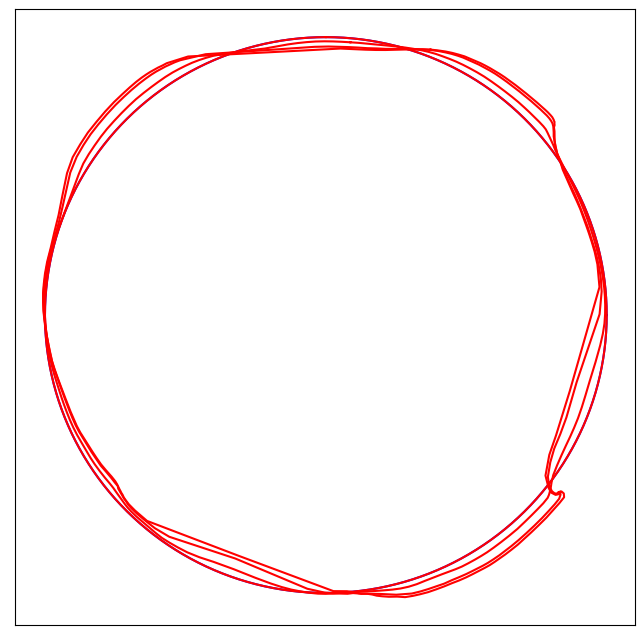

In [299]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(ring[:,0], ring[:,1], 'b')
for inv_man in inv_mans333:   
    ax.plot(inv_man[:,1], inv_man[:,0], 'r')
ax.set_xticks([])
ax.set_yticks([])

In [ ]:
def compute_speed_along_trajectory(trajectory, final_u, final_v):
    speeds = []
    for point in trajectory:
        # Get the vector field value at this point
        u_value, v_value = vector_field_ode(0, point, final_u, final_v)

        # Compute the speed (magnitude of the velocity vector)
        speed = np.sqrt(u_value**2 + v_value**2)
        speeds.append(speed)
    
    return np.array(speeds)

# Example usage with a sample trajectory
trajectory = np.array([[0.5, -0.5], [0.6, -0.5], [0.7, -0.5]])  # Example trajectory points



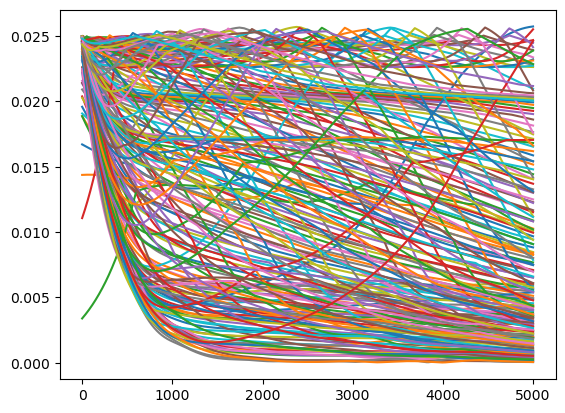

In [190]:
for traj in trajectories:
    speeds = compute_speed_along_trajectory(traj, interp_u, interp_v)
    plt.plot(speeds)